In [7]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

In [8]:
data = pd.read_csv("boston.csv")
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [9]:
data.shape

(506, 14)

In [10]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

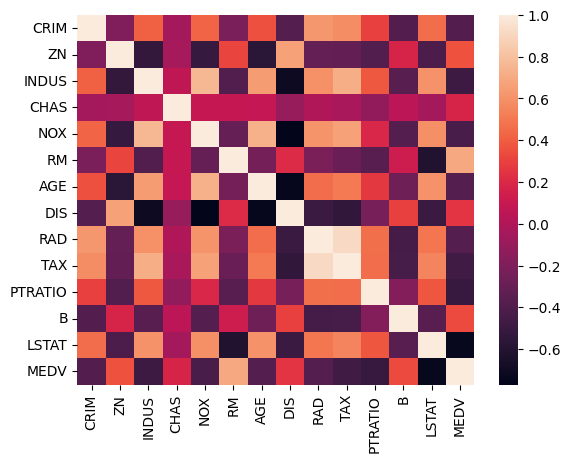

In [11]:
corr = data.corr()
sns.heatmap(corr)
plt.show()

# Data Splitting

In [12]:

def train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True):
    if len(arrays) == 0:
        raise ValueError("At least one array required.")

    n_samples = len(arrays[0])
    for arr in arrays:
        if len(arr) != n_samples:
            raise ValueError("All input arrays must have the same length.")

    if isinstance(random_state, int):
        rng = np.random.RandomState(random_state)
    else:
        rng = np.random if random_state is None else random_state

    if test_size is None and train_size is None:
        test_size = 0.25

    if test_size is not None:
        if isinstance(test_size, float):
            n_test = int(np.ceil(test_size * n_samples))
        else:
            n_test = int(test_size)
    else:
        n_test = n_samples - int(train_size)

    n_train = n_samples - n_test

    if shuffle:
        indices = rng.permutation(n_samples)
    else:
        indices = np.arange(n_samples)

    train_indices = indices[:n_train]
    test_indices = indices[n_train:]

    result = []
    for arr in arrays:
        result.append(np.array(arr)[train_indices])
        result.append(np.array(arr)[test_indices])

    return result

In [13]:
X = data.drop("MEDV", axis = 1)
Y = data["MEDV"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [14]:
print(X_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(Y_train.shape)

(404, 13)
(102, 13)
(102,)
(404,)


# Linear Regression

In [15]:
def compute_cost_linear(X, y, w, b, lambda_=1):
    m = X.shape[0]
    cost = 0 
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost += (f_wb_i - y[i])**2
    cost /= (2 * m)

    # Regularization term
    reg_cost = (lambda_ / (2 * m)) * np.sum(w**2)
    total_cost = cost + reg_cost
    return total_cost

In [16]:
def compute_gradient_linear_reg(X, y, w, b, lambda_):
    m, n = X.shape           
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]                 
        for j in range(n):                         
            dj_dw[j] += err * X[i, j]               
        dj_db += err                        
    dj_dw /= m                                
    dj_db /= m   
    
    # Regularization term
    dj_dw += (lambda_ / m) * w

    return dj_dw, dj_db

In [17]:

def gradient_descent(x, y, w_init, b_init, learning_rate, iterations, lambda_=1):
    w = w_init
    b = b_init
    for i in range(iterations):
        dj_dw, dj_db = compute_gradient_linear_reg(x, y, w, b, lambda_)

        # Update parameters
        w = w - learning_rate * dj_dw
        b = b - learning_rate * dj_db

        if i % 100 == 0 or i == iterations - 1:
            cost = compute_cost_linear(x, y, w, b, lambda_)
            w_str = ", ".join([f"{wi:.4f}" for wi in w])
            print(f"Iteration {i+1}: Cost = {cost:.4f}, w = [{w_str}], b = {b:.4f}")
        
    return w, b

In [18]:
# Normalize data
X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0)
X_train_norm = (X_train - X_mean) / X_std

# Initialize
w_init = np.zeros_like(X_train[0])
b_init = 0
learning_rate = 0.01  
iterations = 5000

# Run gradient descent
w, b = gradient_descent(X_train_norm, Y_train, w_init, b_init, learning_rate, iterations)


Iteration 1: Cost = 289.6889, w = [-0.0366, 0.0342, -0.0485, 0.0156, -0.0428, 0.0652, -0.0378, 0.0255, -0.0365, -0.0461, -0.0455, 0.0318, -0.0700], b = 0.2251
Iteration 101: Cost = 47.0842, w = [-0.6046, 0.4394, -0.6937, 0.7468, -0.5182, 2.6030, -0.2679, -0.6899, -0.0090, -0.5724, -1.3571, 0.6600, -2.3176], b = 14.3503
Iteration 201: Cost = 16.6770, w = [-0.6210, 0.4523, -0.6616, 0.7981, -0.6054, 3.1745, -0.1317, -1.3767, 0.3979, -0.5219, -1.6005, 0.7670, -2.9776], b = 19.5205
Iteration 301: Cost = 12.4026, w = [-0.6471, 0.5180, -0.6502, 0.7462, -0.7665, 3.2688, -0.0750, -1.7926, 0.6588, -0.5532, -1.6925, 0.8214, -3.3014], b = 21.4130
Iteration 401: Cost = 11.6806, w = [-0.6767, 0.5975, -0.6432, 0.7021, -0.9295, 3.2222, -0.0373, -2.0847, 0.8514, -0.6194, -1.7435, 0.8438, -3.4855], b = 22.1057
Iteration 501: Cost = 11.4782, w = [-0.7052, 0.6761, -0.6361, 0.6760, -1.0772, 3.1422, -0.0041, -2.3070, 1.0084, -0.6989, -1.7791, 0.8488, -3.6035], b = 22.3593
Iteration 601: Cost = 11.3746, w = 

# Predicted vs Actual

In [19]:
# Predict function
def predict(X, w, b):
    return np.dot(X, w) + b

# Predict on train data
Y_pred = predict(X_train_norm, w, b)

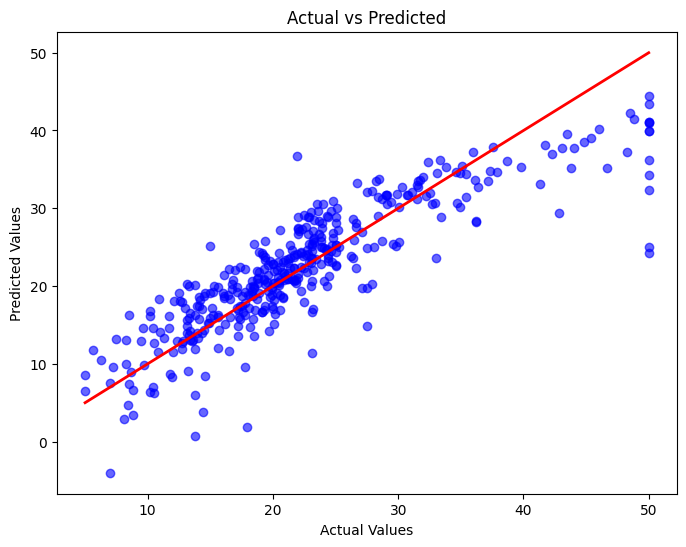

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_train, Y_pred, color='blue', alpha=0.6)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], color='red', linewidth=2)  # y = x line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

# Logistic Regression

In [21]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [22]:
def compute_cost_logistic_reg(X, y, w, b, lambda_ = 1):
    m,n  = X.shape
    cost = 0.
    for i in range(m):
        z_i = np.dot(X[i], w) + b                                      
        f_wb_i = sigmoid(z_i)                                          
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)      
             
    cost = cost/m                                                      
    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)                                          
    reg_cost = (lambda_/(2*m)) * reg_cost                              
    
    total_cost = cost + reg_cost                                       
    return total_cost

In [23]:
def compute_gradient_logistic_reg(X, y, w, b, lambda_): 
    m,n = X.shape
    dj_dw = np.zeros((n,))                            
    dj_db = 0.0                                      

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          
        err_i  = f_wb_i  - y[i]                      
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   
    dj_db = dj_db/m                                   

    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    return dj_db, dj_dw 

In [24]:
def gradient_descent_log(x, y, w_init, b_init, learning_rate, iterations, lambda_=1):
    w = w_init
    b = b_init
    for i in range(iterations):
        dj_db, dj_dw = compute_gradient_logistic_reg(x, y, w, b, lambda_)

        # Update parameters
        w = w - learning_rate * dj_dw
        b = b - learning_rate * dj_db

        if i % 100 == 0 or i == iterations - 1:
            cost = compute_cost_logistic_reg(x, y, w, b, lambda_)
            w_flat = w.flatten()
            w_str = ", ".join([f"{float(wi):.4f}" for wi in w_flat])
            print(f"Iteration {i+1}: Cost = {cost:.4f}, w = [{w_str}], b = {b:.4f}")

    return w, b

In [25]:
# Binary target: 1 if house price > median, else 0
data['target'] = (data['MEDV'] > data['MEDV'].median()).astype(int)

# Drop the original target column (regression value)
X_log = data.drop(['MEDV', 'target'], axis=1).values
Y_log = data['target'].values

# Split for logistic regression
X_train_log, X_test_log, Y_train_log, Y_test_log = train_test_split(X_log, Y_log, test_size=0.2, random_state=42)

# Normalisation for logistic regression
X_mean_log = np.mean(X_train_log, axis=0)
X_std_log = np.std(X_train_log, axis=0)
X_train_log_norm = (X_train_log - X_mean_log) / X_std_log

# Initialize
w_init = np.zeros(X_train_log_norm.shape[1])
b_init = 0.0
learning_rate = 0.02  
iterations = 10000

# Train logistic regression
w, b = gradient_descent_log(X_train_log_norm, Y_train_log, w_init, b_init, learning_rate, iterations)

Iteration 1: Cost = 0.6816, w = [-0.0032, 0.0032, -0.0049, 0.0014, -0.0046, 0.0052, -0.0048, 0.0030, -0.0037, -0.0047, -0.0044, 0.0030, -0.0067], b = -0.0002
Iteration 101: Cost = 0.4290, w = [-0.1023, 0.0959, -0.1612, 0.1120, -0.1529, 0.2880, -0.1875, 0.0275, -0.0850, -0.1549, -0.2235, 0.1181, -0.3518], b = -0.0221
Iteration 201: Cost = 0.3873, w = [-0.1172, 0.0953, -0.1711, 0.1828, -0.1714, 0.4364, -0.2403, -0.0526, -0.0516, -0.1708, -0.3256, 0.1548, -0.5297], b = -0.0442
Iteration 301: Cost = 0.3639, w = [-0.1237, 0.0850, -0.1641, 0.2299, -0.1793, 0.5414, -0.2746, -0.1314, -0.0108, -0.1738, -0.3956, 0.1802, -0.6647], b = -0.0609
Iteration 401: Cost = 0.3484, w = [-0.1290, 0.0739, -0.1546, 0.2628, -0.1879, 0.6216, -0.3027, -0.2007, 0.0275, -0.1761, -0.4488, 0.2015, -0.7768], b = -0.0724
Iteration 501: Cost = 0.3374, w = [-0.1343, 0.0638, -0.1453, 0.2869, -0.1982, 0.6853, -0.3271, -0.2611, 0.0626, -0.1796, -0.4914, 0.2202, -0.8733], b = -0.0802
Iteration 601: Cost = 0.3292, w = [-0.13

In [26]:
def predict_logistic(X, w, b):
    probs = sigmoid(np.dot(X, w) + b)
    return (probs >= 0.5).astype(int)

# Normalize test data using train mean/std
X_train_log_norm = (X_train_log - X_mean_log) / X_std_log

# Predict on test set
Y_pred_log = predict_logistic(X_train_log_norm, w, b)

# Accuracy
accuracy = np.mean(Y_pred_log == Y_train_log)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.8787


# Problem Ridge vs Lasso

In [28]:
def ridge_regression(X, y, alpha, lr=0.01, epochs=1000):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    for epoch in range(epochs):
        y_pred = np.dot(X, w) + b
        error = y_pred - y
        dw = (np.dot(X.T, error) + alpha * w) / m
        db = np.sum(error) / m
        w -= lr * dw
        b -= lr * db
    return w, b


In [29]:
def lasso_regression(X, y, alpha, lr=0.01, epochs=1000):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    for epoch in range(epochs):
        y_pred = np.dot(X, w) + b
        error = y_pred - y
        dw = (np.dot(X.T, error) + alpha * np.sign(w)) / m
        db = np.sum(error) / m
        w -= lr * dw
        b -= lr * db
    return w, b

Feature		Ridge Weight	Lasso Weight
CRIM      	-0.9141		-0.9164
ZN        	 1.0564		 1.0610
INDUS     	 0.0863		 0.0887
CHAS      	 0.6896		 0.6872
NOX       	-2.0232		-2.0341
RM        	 2.6885		 2.6838
AGE       	 0.0083		 0.0057
DIS       	-3.0793		-3.0986
RAD       	 2.5130		 2.5409
TAX       	-1.9215		-1.9447
PTRATIO   	-2.0494		-2.0529
B         	 0.8483		 0.8470
LSTAT     	-3.7276		-3.7363


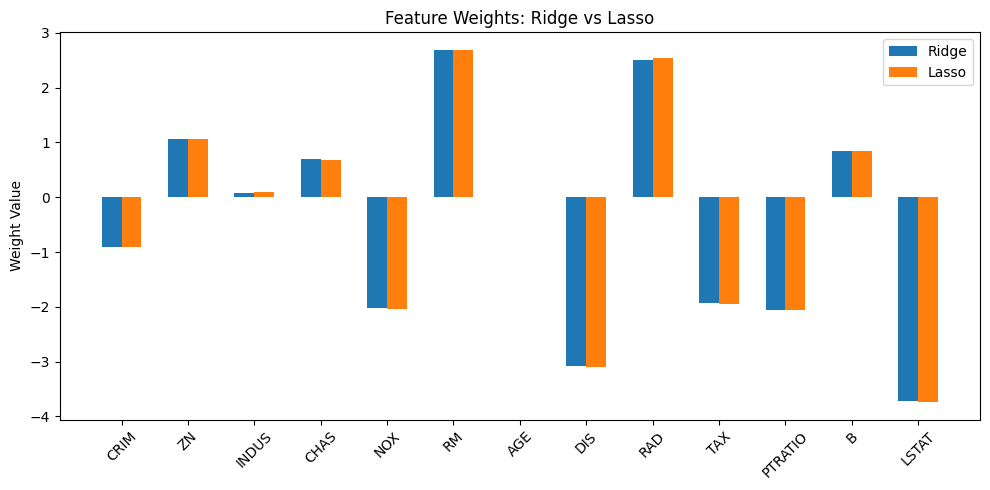

In [31]:
# Normalize features
X = data.drop(['MEDV', 'target'], axis=1).values
y = data['MEDV'].values
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_norm = (X - X_mean) / X_std

alpha = 1.0
w_ridge, b_ridge = ridge_regression(X_norm, y, alpha, lr=0.01, epochs=5000)
w_lasso, b_lasso = lasso_regression(X_norm, y, alpha, lr=0.01, epochs=5000)

# Compare weights
feature_names = data.drop(['MEDV', 'target'], axis=1).columns
print("Feature\t\tRidge Weight\tLasso Weight")
for name, wr, wl in zip(feature_names, w_ridge, w_lasso):
    print(f"{name:10s}\t{wr: .4f}\t\t{wl: .4f}")

# Analyze effect of regularization
plt.figure(figsize=(10,5))
plt.bar(np.arange(len(w_ridge))-0.15, w_ridge, width=0.3, label='Ridge')
plt.bar(np.arange(len(w_lasso))+0.15, w_lasso, width=0.3, label='Lasso')
plt.xticks(np.arange(len(feature_names)), feature_names, rotation=45)
plt.ylabel("Weight Value")
plt.title("Feature Weights: Ridge vs Lasso")
plt.legend()
plt.tight_layout()
plt.show()